In [1]:
from brian2 import *


prefs.codegen.target = "numpy"

<div>
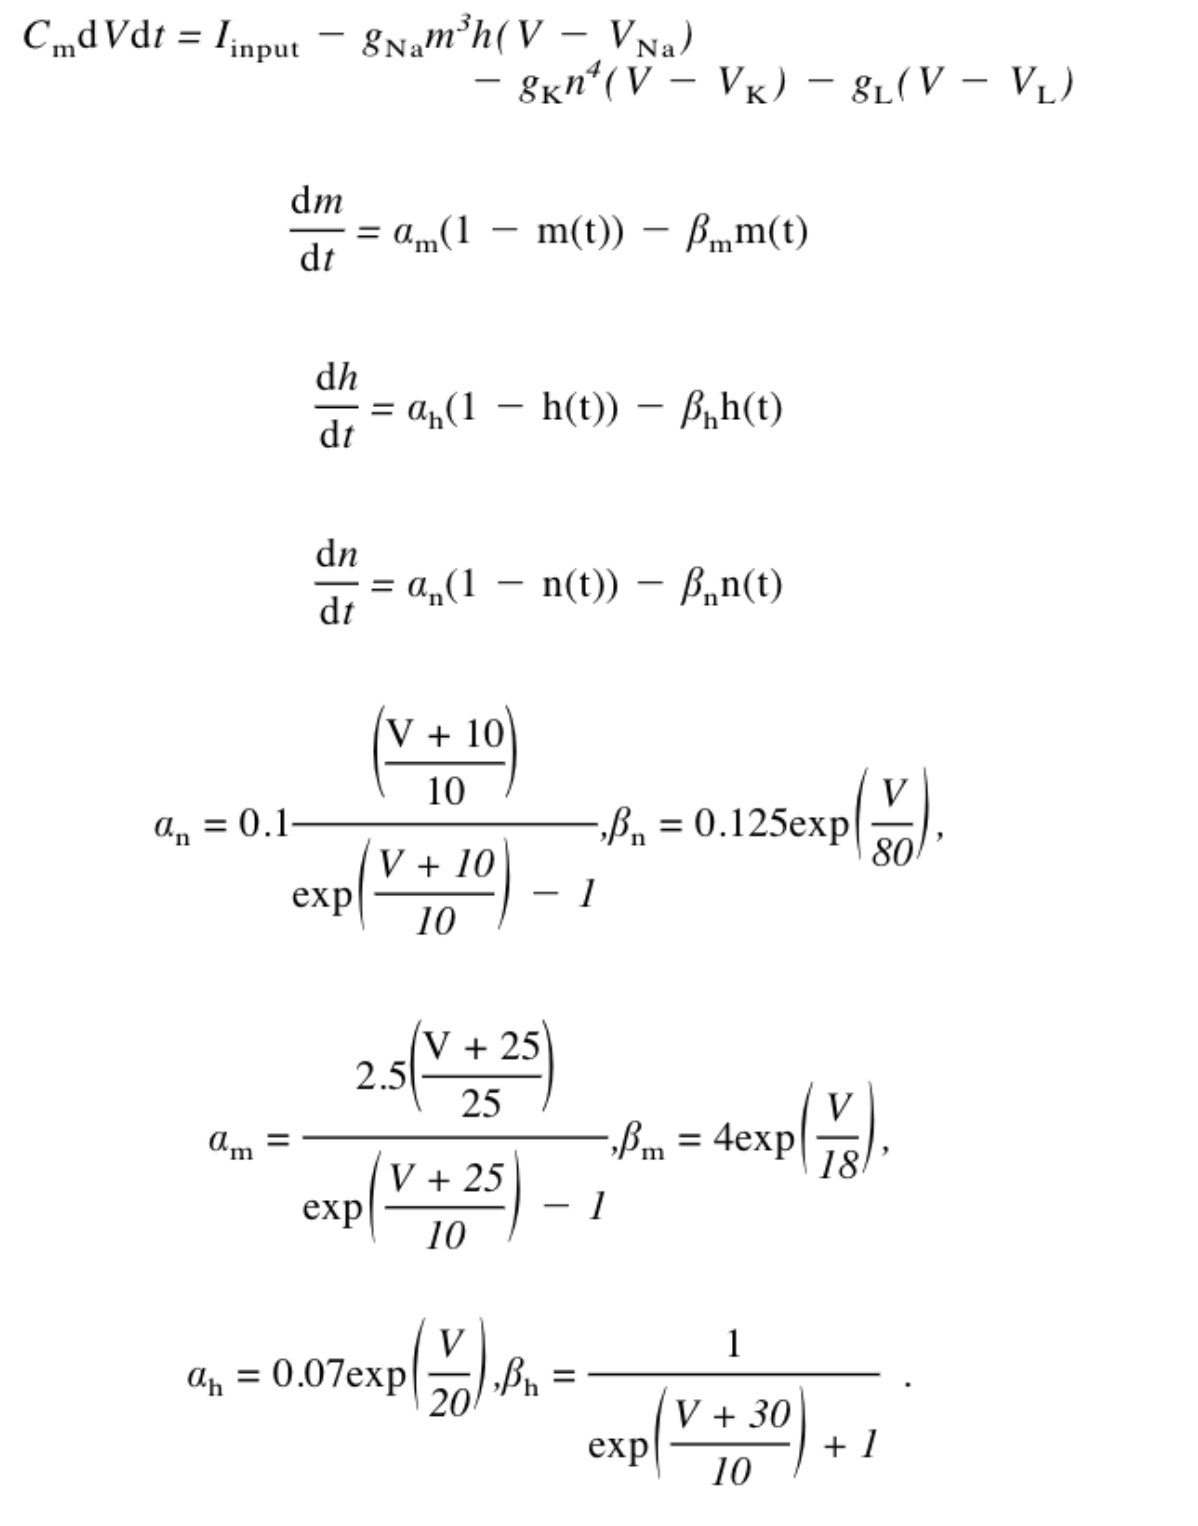
</div> \


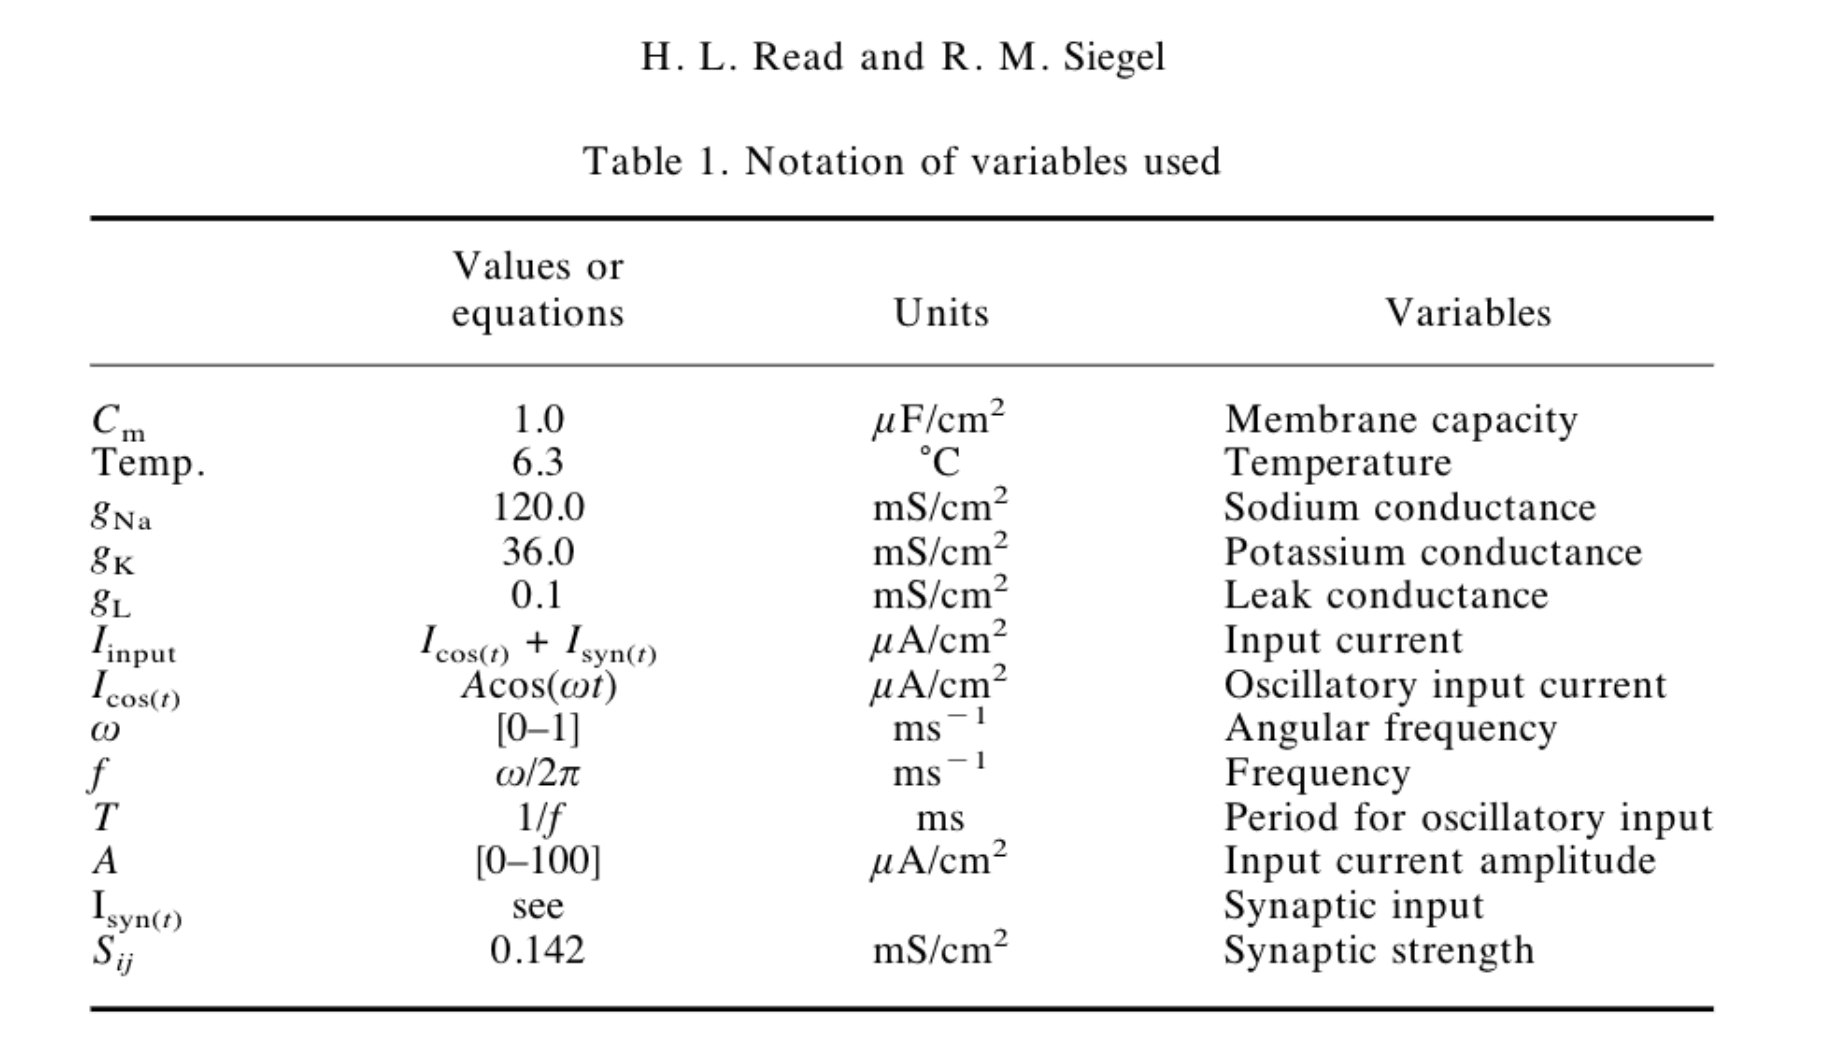

In [95]:
somesize = 120 * um**2
Cm = 1. * ufarad/cm**2 * somesize
g_Na = 120 * msiemens/cm**2 * somesize
g_K = 36 * msiemens/cm**2 * somesize
g_l = .3 * msiemens/cm**2 * somesize  # very suspicious (original: 0.1)
E_l = 10 * mV
E_Na = 115 * mV
E_K = -12 * mV

eqs = """
dV/dt = (Iinp - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_l * (V - E_l))/Cm : volt
Iinp : ampere
dm/dt = alpha_m * (1 - m) - beta_m * m : 1
dh/dt = alpha_h * (1 - h) - beta_h * h : 1
dn/dt = alpha_n * (1 - n) - beta_n * n : 1
alpha_m = 1/exprel((-V/mV+25)/10)/ms : Hz
beta_m = 4 * exp(-V/mV/18) / ms : Hz
alpha_h = 0.07 * exp(-V/mV/20) / ms : Hz
beta_h = 1 / (exp(-V/mV + 30)/10 + 1) / ms : Hz
alpha_n = 1 /exprel((-V/mV + 10)/10) / ms : Hz
beta_n = 0.125 * exp(-V/mV/80) / ms : Hz
"""

nrn = NeuronGroup(1, eqs, method='exponential_euler')

stmon = StateMonitor(nrn, ['V', 'm', 'h', 'n'], True)
nrn.Iinp = 0 * pA  # up to 120 pA
nrn.V = 0*mV
nrn.m = 0
nrn.h = 1
nrn.n = 0.5

run(50*ms)
nrn.Iinp = 400 * pA
run(50*ms)
nrn.Iinp = 0 * pA
run(50*ms)

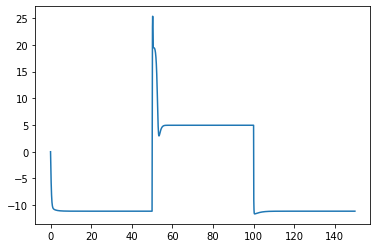

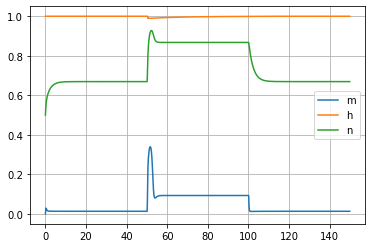

In [96]:
plot(stmon.t/ms, stmon.V[0]/mV)
figure()
plot(stmon.t/ms, stmon.m[0], label='m')
plot(stmon.t/ms, stmon.h[0], label='h')
plot(stmon.t/ms, stmon.n[0], label='n')
legend()
grid()

In [ ]:
alpha_m = 1/exprel((V/mV+25)/10)/ms : Hz
beta_m = 4 * exp(V/mV/18) / ms : Hz
alpha_h = 0.07 * exp(V/mV/10) / ms : Hz
beta_h = 1 / (exp(V/mV + 30)/10 + 1) / ms : Hz
alpha_n = 0.1 /exprel((V/mV + 10)/10) / ms : Hz
beta_n = 0.125 * exp(V/mV/80) / ms : Hz

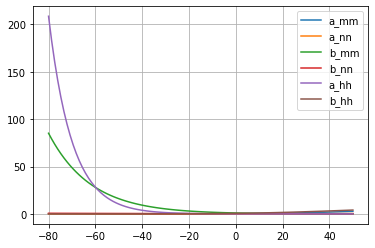

In [45]:
# supp
vv = linspace(-80, 50, 100)
a_mm = 2.5 * (-vv + 25)/25 / (exp((-vv+25)/10) - 1)
b_mm = 1 * exp(-vv/18)
a_nn = 0.1 * (-vv + 10)/10 / (exp((-vv+10)/10) - 1)
b_nn  = 1/4 * exp(-vv/80)
a_hh = 0.07 * exp(-vv/10)
b_hh = 1/exprel((-vv + 10)/10)

plot(vv, a_mm, label='a_mm')
plot(vv, a_nn, label='a_nn')
plot(vv, b_mm, label='b_mm')
plot(vv, b_nn, label='b_nn')
plot(vv, a_hh, label='a_hh')
plot(vv, b_hh, label='b_hh')
legend()
grid()

In [ ]:
# supp soma size and overall conductance
soma_size = 80 * um**2
gnav = 120 * msiemens/cm**2
overall_cond = soma_size * gnav
overall_cond

In [ ]:
gk_kr = 40 * nS
gk = 36 * msiemens/cm**2
somasize = 120 * um**2
gk * somasize

In [ ]:
gl = 0.1 * mS/cm**2
somasize * gl

In [ ]:
inpI = 100 * uA/cm**2
inpI * somasize